In [19]:
# region ----------Imports ----------
from SnakeBoard import SnakeBoard
from SnakeGame import SnakeGame
from NeuralNetwork import NeuralNetwork
import pygame
import numpy as np
import matplotlib.pyplot as plt
#endregion

# Plot histograms comparing different populations (list of populations)
def plot_game_histograms(games_data):
    """
    Plot histograms for a list of arrays, each representing data for a different game.
    
    Parameters:
    games_data (list of np.array): List of arrays where each array contains data for a game.
    """
    num_games = len(games_data)
    fig, axs = plt.subplots(num_games, figsize=(5, 6), sharex=True)

    if num_games == 1:
        axs = [axs]

    for i, data in enumerate(games_data):
        axs[i].hist(data, bins=30, edgecolor='black')
        axs[i].set_title(f'Game {i+1} Histogram')
        axs[i].set_ylabel('Frequency')
        axs[i].set_xlabel('Score')
    axs[-1].set_xlabel('Value')
    plt.tight_layout()
    plt.show()

# Run a single game instance until game over
def run_game(s_game, s_ann, s_board, show_visuals, manual_play):
    while True:     
        # Get current game state 
        state = s_game.get_game_state()
        
        # If showing visuals, get key
        # (even in auto-play mode it's important to don't freeze - pygame needs to be queried to events every ~5s)
        if show_visuals:
            next_move = get_key()            
        
        # Detect pause behavior
        if manual_play == 1 and next_move == "PAUSE":
            while 1:
                next_move = get_key()
                if next_move != "IDLE":
                    break                    
        elif manual_play == 0:    
            # Feed ANN with game state and calc. next move
            next_move = s_ann.calculate(state) 

        # Step game based on ANN input 
        [game_over, w_score, score] = s_game.step_game(next_move)

        # Update graphics of all games (visual feedback)
        s_board.clear_board()
        s_board.update_board_elements()

        # If all game instances are over, finish current generation
        if game_over:
            break
    
    return {"game_over":    game_over, 
            "score":        score, 
            "w_score":      w_score}

# Get key event for manual play    
def get_key():
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_UP:
                return 'UP'
            if event.key == pygame.K_DOWN:
                return 'DOWN'
            if event.key == pygame.K_LEFT:
                return 'LEFT'
            if event.key == pygame.K_RIGHT:
                return 'RIGHT'
            if event.key == pygame.K_p:
                return 'PAUSE'
            if event.key == pygame.K_SPACE:
                pygame.quit()
                quit()
    return 'IDLE'

In [20]:


# Run a certain number of games instances using a certain "DNA" to extract tis results statistically. 
# Them, repeat with another "DNA set"

# DNA 1
game, ann = SnakeGame(), NeuralNetwork()
board = SnakeBoard([game], False)
board.init_board()
ann.load_weights_biases("./experiment_data_testdel2/Gen_210/ANN_1_score_33.npz") # Exp 1
scores_1 = []
for i in range(100):
    scores_1.append(run_game(game, ann, board, False, False))
    game.reset_game()
    
# DNA 2
game, ann = SnakeGame(), NeuralNetwork()
board = SnakeBoard([game], False)
board.init_board()
#ann.load_weights_biases("./experiment_data_testdel2/Gen_210/ANN_2400_score_1.npz") # Exp 2
ann.load_weights_biases("./experiment_data_testdel2/Gen_210/ANN_2499_score_0.npz") # Exp 2
scores_2 = []
for i in range(100):
    scores_2.append(run_game(game, ann, board, False, False))
    game.reset_game()

SnakeBoard instance created.
SnakeBoard instance created.


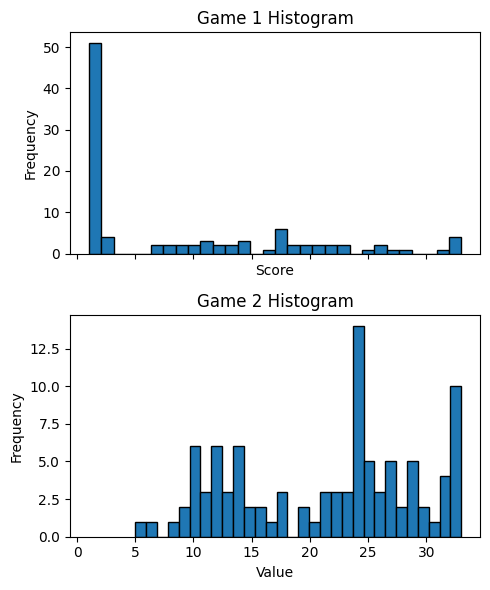

In [21]:
# Compare the results of both "DNAs" in a histogram
plot_game_histograms([
    [g['score'] for g in scores_1],
    [g['score'] for g in scores_2],
    ])